In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [11]:
# K = 20
mu = 0
sigma = 1
theta = np.random.normal(mu, sigma, 20)

In [12]:
theta

array([-1.54101238,  1.84356979, -0.94676556,  0.30147803, -0.46678335,
       -0.78454303,  0.56972648, -0.68137606,  0.58137367, -0.17353814,
        0.02829836,  1.69255276, -1.31362643,  1.76441982,  0.81346651,
        0.03005226, -0.10152034,  0.13601259,  0.96682846,  0.6821977 ])

In [13]:

mean = 0
std = 2
X_vc = np.random.normal(mean, std, size = (5000,20))
X_c = np.random.normal(mean, std, size = (400,20))
X_Costly = np.random.normal(mean, std, size = (5,20))

In [14]:
epsilon1 = np.random.normal(0 , 0.31, 5000).reshape(5000,1)
epsilon2 = np.random.normal(0 , 0.31, 400).reshape(400,1)
epsilon3 = np.random.normal(0 , 0.31, 5).reshape(5,1)

In [15]:
epsilon1.shape

(5000, 1)

In [16]:
theta = theta.reshape(20,1)

In [17]:
y1 = X_vc@theta + epsilon1
y2 = X_c@theta + epsilon2
y3 = X_Costly@theta + epsilon3

In [18]:
lr = LinearRegression()
ridge = Ridge()

In [19]:
lr.fit(X_vc, y1)

LinearRegression()

In [20]:
theta_1 = lr.coef_

In [21]:
theta_1

array([[-1.54233312,  1.84829661, -0.9488784 ,  0.3023441 , -0.46592384,
        -0.7844748 ,  0.56783513, -0.6799327 ,  0.57999226, -0.17196163,
         0.02480016,  1.69007518, -1.31679563,  1.76587564,  0.81343512,
         0.0302461 , -0.10084894,  0.13918952,  0.96684946,  0.68323926]])

In [22]:
lr.fit(X_c, y2)

LinearRegression()

In [23]:
theta_2 = lr.coef_
theta_2

array([[-1.54194228,  1.84242184, -0.94605812,  0.3148318 , -0.47531567,
        -0.78524032,  0.57760939, -0.68265341,  0.58367931, -0.15892526,
         0.02728827,  1.69235979, -1.31039002,  1.77013463,  0.81399873,
         0.01575475, -0.08781487,  0.12961145,  0.96412384,  0.684479  ]])

In [24]:
lr.fit(X_Costly, y3)

LinearRegression()

In [25]:
theta_3 = lr.coef_
theta_3

array([[ 0.13156472,  0.15016394, -1.12156228,  0.12123262,  0.12366747,
        -0.35901866,  0.18728692, -0.04076419,  0.09317737, -0.09571479,
        -0.04951589,  0.50193769, -0.71313723, -0.01102439,  0.14976585,
        -0.54906952, -0.44217636, -0.66591537,  1.19826978,  0.06505576]])

In [26]:
dist1 =  np.linalg.norm(theta - theta_1)
dist2 =  np.linalg.norm(theta - theta_2)
dist3 =  np.linalg.norm(theta - theta_3)
dist1

26.81914677721543

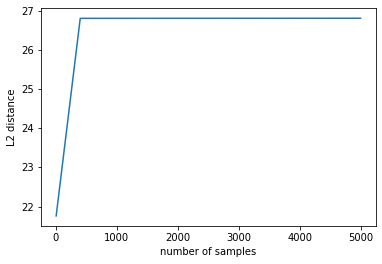

In [31]:
samples = np.array([5, 400, 5000])
l2 = np.array([dist3, dist2, dist1])
plt.plot(samples, l2)
plt.xlabel("number of samples")
plt.ylabel('L2 distance')
plt.show()

In [33]:
lambda_parameter = [0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 1, 10]
dist = []
for i in range(0, 8):
    ridge = Ridge(alpha = lambda_parameter[i])
    ridge.fit(X_vc, y1)
    theta_ = ridge.coef_
    dist.append(np.linalg.norm(theta - theta_))

In [34]:
dist

[26.819140122863836,
 26.819133468520626,
 26.819120159859345,
 26.81909354263736,
 26.819040308595717,
 26.81893384212164,
 26.818481383542828,
 26.81249660993795]

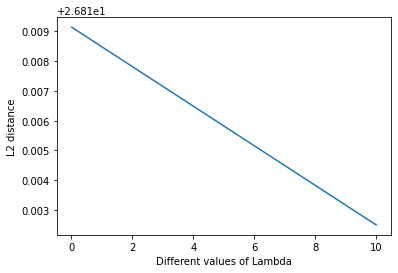

In [35]:
plt.plot(lambda_parameter, dist)
plt.xlabel("Different values of Lambda")
plt.ylabel('L2 distance')
plt.show()